# **Enhancing Stock Price Prediction with Ensemble Models**

# Objective
Investigate the effectiveness of combining Random Forest Classifier and LSTM/RNN as an ensemble model for stock price prediction, aiming to leverage the strengths of both approaches.

# Introduction

In recent years, the application of Artificial Intelligence (AI) techniques has significantly impacted the field of stock market analysis. This thesis explores the application of three prominent AI techniques—Random Forest Classifier, Recurrent Neural Network with Long Short-Term Memory (RNN-LSTM), and Ensemble Learning through a Voting Classifier. A brief literature review sets the foundation for understanding how these techniques have been utilized in stock market prediction. The subsequent sections delve into the strengths, weaknesses, advantages, and disadvantages of each technique, providing insights into their application and potential challenges.



# Literature Review

In this research, the primary objective is to enhance stock price prediction by investigating the effectiveness of combining Random Forest Classifier and Long Short-Term Memory/Recurrent Neural Network (LSTM/RNN) in an ensemble model. The motivation behind this approach is to leverage the strengths of both Random Forest, known for handling non-linear relationships and providing robust predictions, and LSTM/RNN, proficient in capturing sequential dependencies in time series data. The research involves a comprehensive literature review, discussing the individual strengths, weaknesses, advantages, and disadvantages of Random Forest Classifier and LSTM/RNN. Random Forests are recognized for their ability to handle complex relationships, while LSTM/RNN excels in modeling sequential dependencies, albeit with computational intensity and susceptibility to overfitting. The proposed ensemble model, employing a Voting Classifier, aims to combine the diverse strengths of these models to improve overall prediction accuracy and robustness in stock market analysis.


The second part of the content discusses an abstract that emphasizes the application of ensemble machine learning for stock market prediction. The authors propose a weighted ensemble model using Support Vector Regression (SVR), LSTM, and Multiple Regression. The study explores different ensemble methods, including max voting, averaging, and weighted averaging, where the combination of diverse models is seen as a means to enhance overall prediction quality. The paper underscores the advantages of ensemble learning, citing improved accuracy, reduced variance, and better predictions compared to individual models. The authors explain the ensemble approach as a consolidation of base models, each assigned a weight based on its importance, thereby improving the generalization ability of the overall model. The research specifically focuses on stock market prediction as a supervised classification problem and uses ensemble learning to overcome the limitations of individual models, with the weighted averaging method demonstrating superior accuracy and robustness.

## Random Forest Classifier

Random Forests have gained popularity in financial forecasting due to their ability to handle complex, non-linear relationships in data. Researchers (Li et al., 2015) demonstrated the effectiveness of Random Forests in predicting stock prices by considering a wide range of features such as technical indicators and historical prices. The ensemble nature of Random Forests allows them to reduce overfitting and provide robust predictions.


## Key Concepts and Mechanisms


**Ensemble Learning**

Random Forest operates on the principle of ensemble learning, where it builds multiple decision trees during training and amalgamates their outputs. The synergy of diverse decision trees contributes to enhanced predictive accuracy and model robustness.

**Decision Trees**

At the heart of a Random Forest are decision trees, each constructed using a random subset of the training data and a random subset of features at each split. This randomness introduces diversity, preventing the model from fixating on specific features.

**Bagging (Bootstrap Aggregating)**

Random Forest employs bagging, a technique involving training each tree on a bootstrapped sample of the data. This further diversifies the individual trees, contributing to the overall robustness of the model.

**Feature Importance**

A distinctive feature of Random Forest is its ability to provide insights into feature importance. By assessing how much each feature contributes to reducing impurity across all trees, practitioners gain valuable information on the driving factors behind predictions.

---

## Applications in Stock Price Prediction


**1. Handling Non-linearity**

Stock prices are subject to intricate non-linear relationships influenced by numerous factors. Random Forest excels in capturing these complex patterns, making it adept at modeling the dynamic nature of financial markets.

**2. Robustness to Overfitting**

The ensemble nature of Random Forest mitigates overfitting, a common challenge in stock price prediction. The amalgamation of diverse decision trees promotes generalization to unseen data.

**3. Feature Diversity**

Random Forest considers multiple features when making predictions. In stock market analysis, where various factors contribute to stock price movements, this feature diversity proves advantageous.

## Strengths and Weaknesses of each model.

# Random Forest Classifier
**Strengths**
1.	Non-linearity Handling: Random Forests excel in capturing non-linear relationships in data, allowing them to model complex stock price movements.
2.	Ensemble Nature: The ensemble of decision trees reduces overfitting and enhances generalization to new data.
3.	Feature Importance: Random Forests provide insights into feature importance, aiding in the identification of influential factors.

**Weaknesses**
1.	Computational Complexity: Training Random Forests can be computationally intensive, especially with large datasets and a high number of trees.
2.	Bias towards Dominant Classes: In imbalanced datasets, Random Forests may exhibit a bias towards the majority class.

# RNN-LSTM
**Strengths**
1.	Sequential Modeling: RNN-LSTM excels in capturing sequential dependencies, crucial for understanding evolving patterns in stock prices.
2.	Long-Term Memory: LSTMs overcome the vanishing gradient problem, enabling them to learn and remember long-term dependencies in time series data.
3.	Flexibility: LSTMs can handle various input types, including textual data and numerical features.

**Weaknesses**
1.	Computational Intensity: Training RNN-LSTM models can be resource-intensive, especially with large datasets.
2.	Overfitting: LSTMs are prone to overfitting, requiring careful tuning of hyperparameters to prevent excessive model complexity.

# Ensemble Learning with Voting Classifier
**Strengths**
1.	Model Diversity: Combining Random Forest and RNN-LSTM leverages the strengths of both models, improving overall prediction accuracy.
2.	Robustness: Ensemble models are less susceptible to the weaknesses of individual models, providing robust predictions.
3.	Versatility: The Voting Classifier allows for flexible integration of diverse models, enabling adaptation to different data characteristics.

**Weaknesses**
1.	Complexity: Managing and interpreting ensemble models can be complex, requiring careful consideration of individual model behaviors.
2.	Computational Overhead: Combining predictions from multiple models introduces additional computational overhead.



## High Level Diagram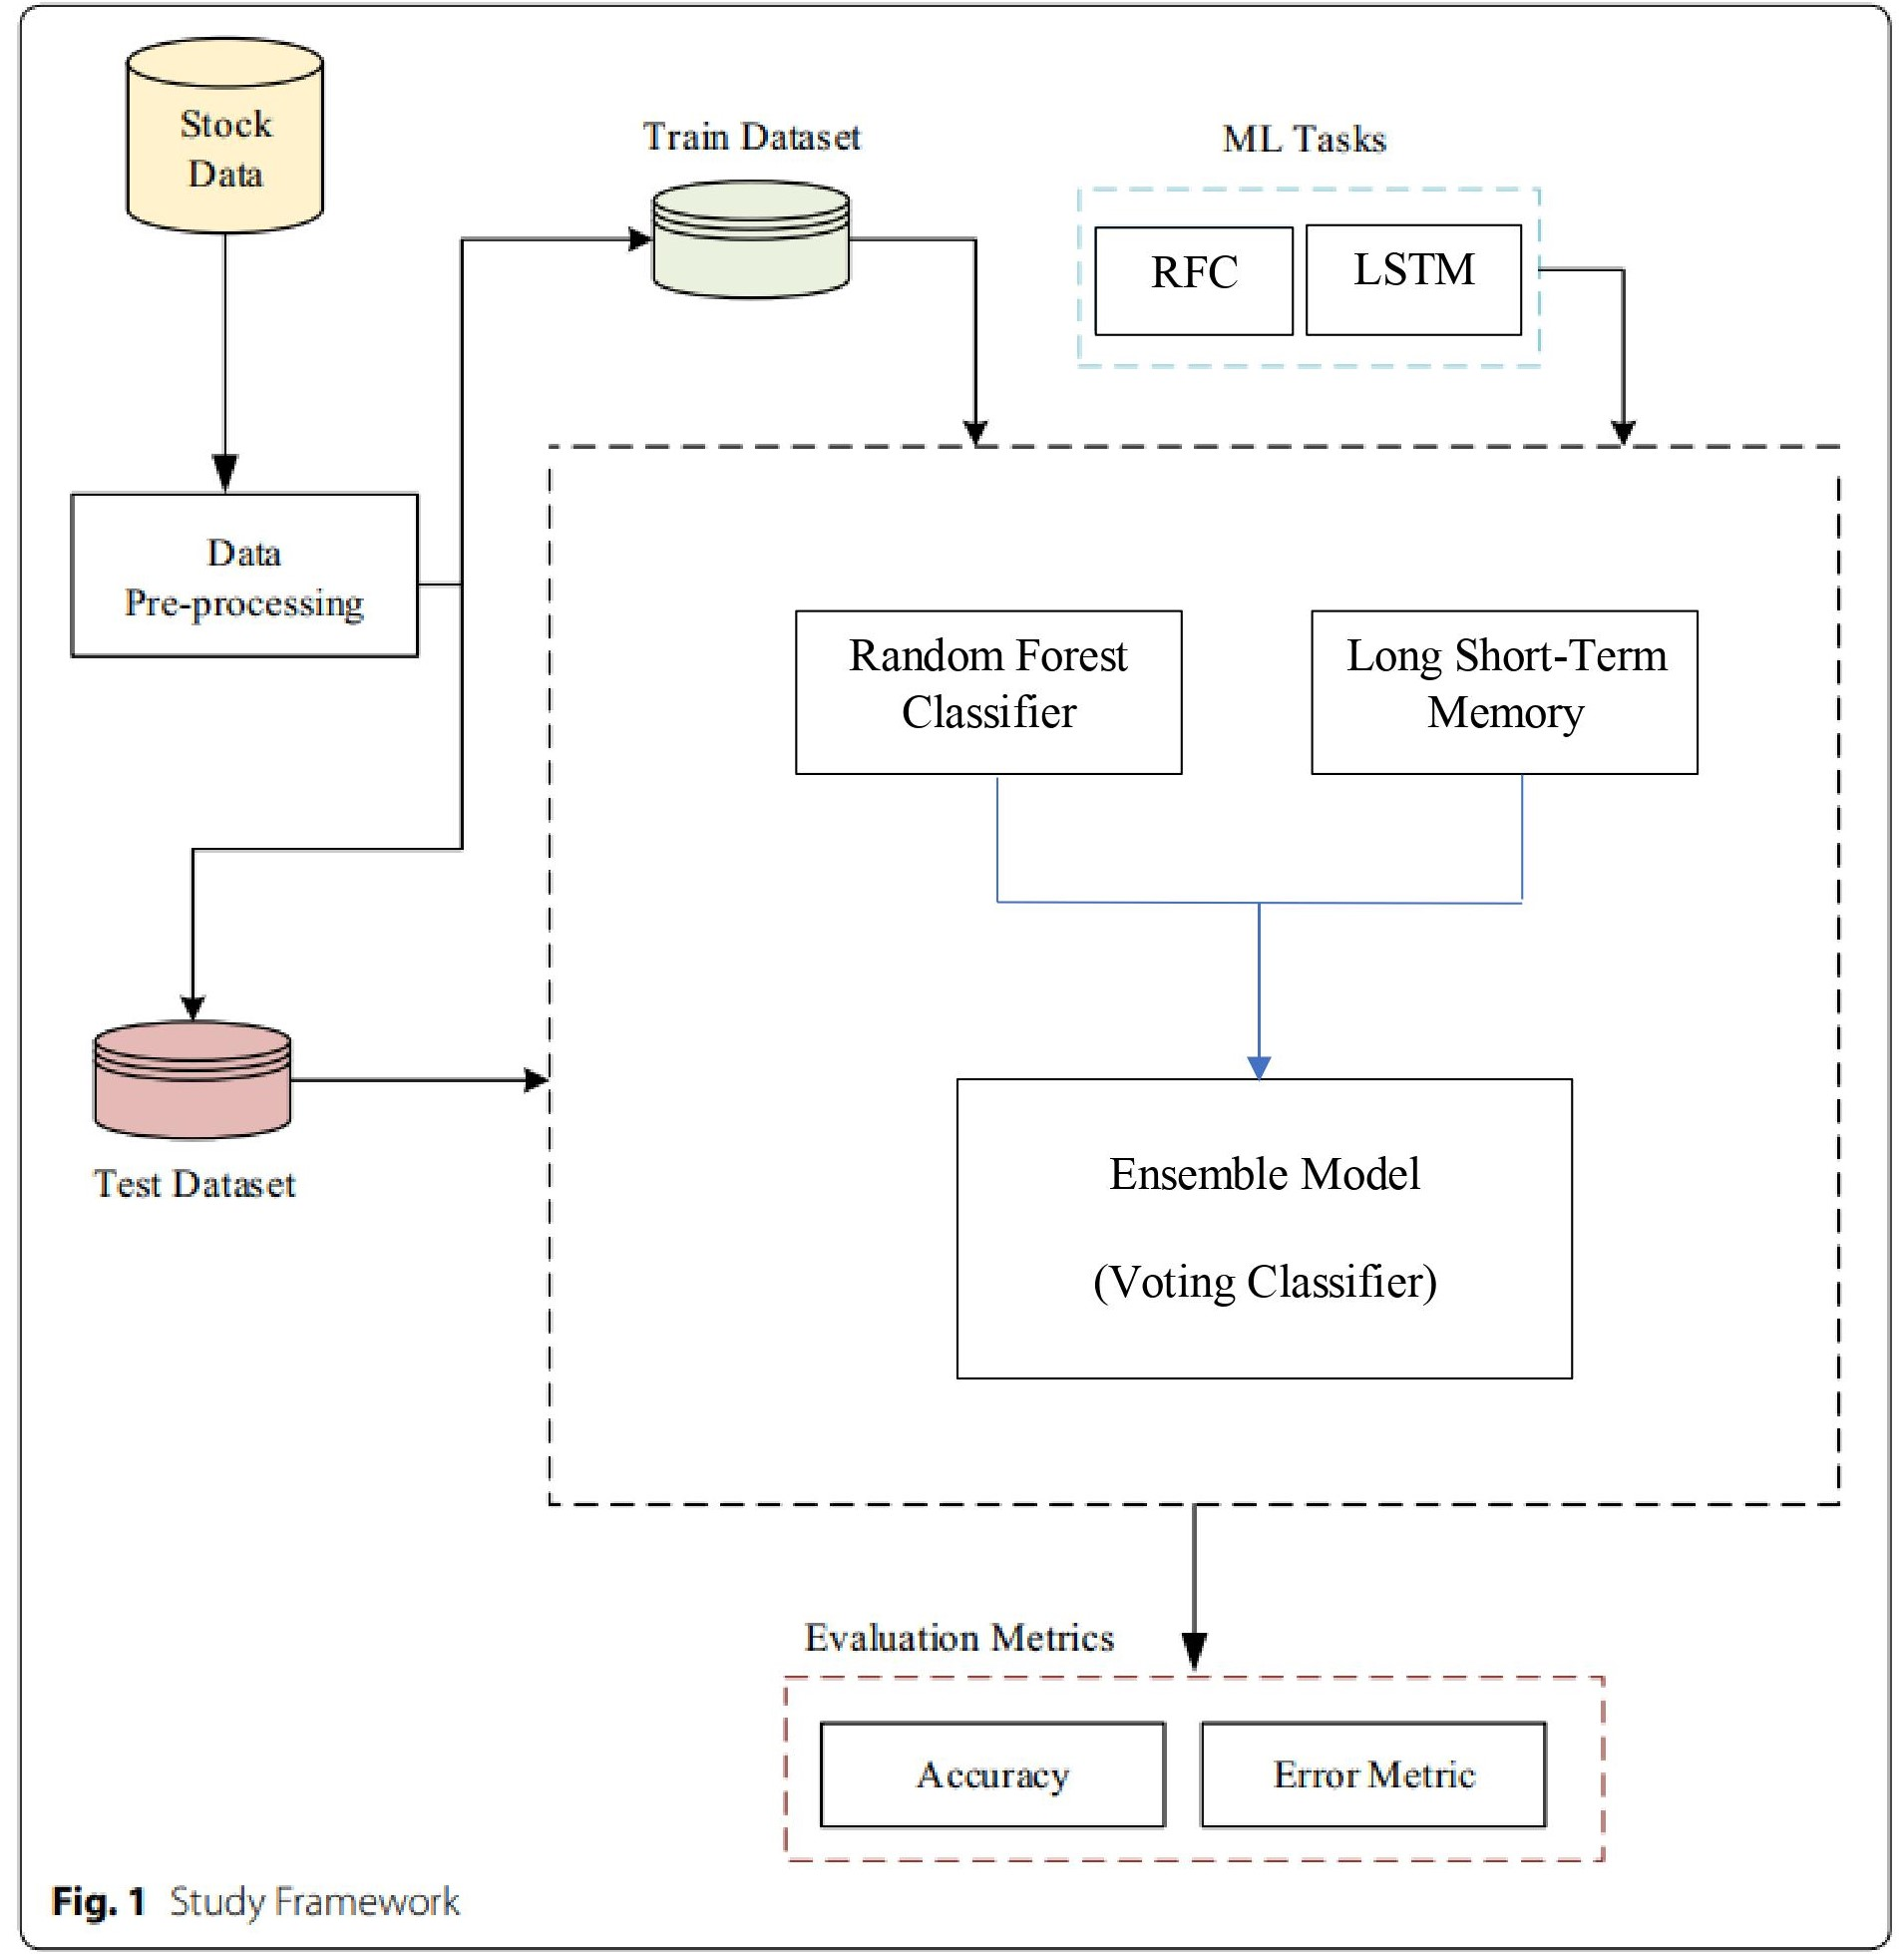

---

## Step 1: Data Preparation



In [292]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import VotingClassifier

In [293]:
# Specify the path to your CSV file
csv_file_path = 'MSFT.csv'

# Load data into a pandas DataFrame
stock_data = pd.read_csv(csv_file_path)

In [294]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-18,103.750000,104.510002,102.519997,103.970001,98.729622,49319200
1,2018-12-19,103.650002,106.879997,101.349998,103.690002,98.463737,68198200
2,2018-12-20,103.050003,104.309998,98.779999,101.510002,96.393608,70334200
3,2018-12-21,101.629997,103.000000,97.459999,98.230003,93.278915,111242100
4,2018-12-24,97.680000,97.970001,93.980003,94.129997,89.385567,43935200
...,...,...,...,...,...,...,...
1253,2023-12-11,368.480011,371.600006,366.100006,371.299988,371.299988,27708800
1254,2023-12-12,370.850006,374.420013,370.459991,374.380005,374.380005,24838300
1255,2023-12-13,376.019989,377.640015,370.769989,374.369995,374.369995,30955500
1256,2023-12-14,373.309998,373.760010,364.130005,365.929993,365.929993,43277500


In [295]:
# Assuming 'stock_data' is the loaded DataFrame with stock price data

# Handle missing values
stock_data.dropna(inplace=True)

In [296]:
# Feature engineering (example: creating a simple indicator)
stock_data['Price_Direction'] = (stock_data['Close'] - stock_data['Open']).apply(lambda x: 1 if x > 0 else 0)

In [297]:
# Split data into input features (X) and labels (y)
features = ['Open', 'Close', 'High', 'Low', 'Volume']  # Adjust based on your dataset
X = stock_data[features]
y = stock_data['Price_Direction']

In [298]:
X

,Open,Close,High,Low,Volume
0,103.750000,103.970001,104.510002,102.519997,49319200
1,103.650002,103.690002,106.879997,101.349998,68198200
2,103.050003,101.510002,104.309998,98.779999,70334200
3,101.629997,98.230003,103.000000,97.459999,111242100
4,97.680000,94.129997,97.970001,93.980003,43935200
...,...,...,...,...,...
1253,368.480011,371.299988,371.600006,366.100006,27708800
1254,370.850006,374.380005,374.420013,370.459991,24838300
1255,376.019989,374.369995,377.640015,370.769989,30955500
1256,373.309998,365.929993,373.760010,364.130005,43277500


### Plot Visualization

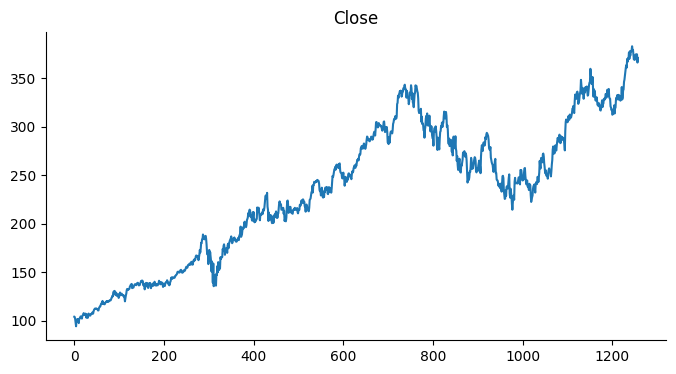

In [299]:
from matplotlib import pyplot as plt
X['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [300]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [301]:
# Encode labels if they are not binary (0 or 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
## Step 2: Random Forest Classifier

**Standardize Data**

In [302]:
# Assuming X_train and X_test are your training and testing sets after the train-test split
# Initialize the StandardScaler
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0,1))

# Fit the scaler on the training data and transform both training and testing sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Model
**Model Building**

In [303]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [304]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
#Improve n_estimators
# Train the model on the scaled training data
rf_classifier.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
rf_predictions = rf_classifier.predict(X_test_scaled)

### Plots for Random Forest Classifire Model

In [305]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

**Confution Matrix**

In [306]:
# Create a confusion matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

In [307]:
rf_cm

array([[ 80,  35],
       [ 30, 107]])

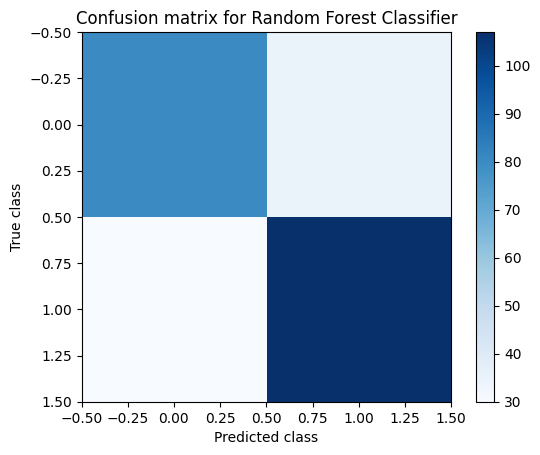

In [308]:
# Plot the confusion matrix
plt.imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix for Random Forest Classifier')
plt.show()

In [309]:
from sklearn.metrics import roc_curve
# Create a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_predictions)

In [310]:
fpr, tpr, thresholds

(array([0.        , 0.30434783, 1.        ]),
 array([0.       , 0.7810219, 1.       ]),
 array([2, 1, 0]))

**Evaluation Metrices for Random Forest Classifire**

In [311]:
# Evaluate the model Random Forest Classifire
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Display evaluation metrics
print(f"Random Forest Classifier - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

Random Forest Classifier - Accuracy: 0.7421, Precision: 0.7535, Recall: 0.7810, F1 Score: 0.7670


## Step 3: RNN/LSTM - Long Short-Term Memory
**Model Building**

In [312]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math

In [313]:
# Prepare Data for LSTM/RNN

# Scale the input features between 0 and 1 using Min-Max scaling
scaler = MinMaxScaler()
# scaler = MinMaxScaler(feature_range=(0,1))
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [314]:
fromCSV = pd.read_csv('MSFT.csv', usecols=['Open', 'Close', 'High', 'Low', 'Volume'])
fromCSV2 = pd.read_csv('MSFT.csv', usecols=['Close'])
dataset = fromCSV2.values
print(dataset)
training_data_len = math.ceil(len(dataset) * .75)
#scaled_data = scaler.fit_transform()

[[103.970001]
 [103.690002]
 [101.510002]
 ...
 [374.369995]
 [365.929993]
 [370.730011]]


In [315]:
scaler = MinMaxScaler(feature_range=(0,1))   # scaled values to bet set between 1 and 0
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.03409919],
       [0.03312889],
       [0.0255744 ],
       ...,
       [0.97113346],
       [0.94188579],
       [0.9585196 ]])

In [316]:
train_dataMSFT = scaled_data[0 : training_data_len, :]


x_train = []
y_train = []


for i in range(60, len(train_dataMSFT)):
    x_train.append(train_dataMSFT[ i-60: i, 0])
    y_train.append(train_dataMSFT[i, 0])

    if i <= 61  :
        print(x_train)
        print(y_train)
        print()


[array([0.03409919, 0.03312889, 0.0255744 , 0.01420801, 0.        ,
       0.02228229, 0.02443082, 0.02169318, 0.02578231, 0.02422291,
       0.01133176, 0.02702985, 0.02748034, 0.03004472, 0.03513879,
       0.032817  , 0.03004472, 0.0274457 , 0.03770317, 0.03898534,
       0.04154973, 0.04705964, 0.04002496, 0.04359428, 0.04182694,
       0.04518834, 0.03794575, 0.03052987, 0.0424507 , 0.03569325,
       0.0299754 , 0.04023287, 0.04536162, 0.04123783, 0.03860415,
       0.0399903 , 0.03853485, 0.04421805, 0.04394081, 0.04425271,
       0.04882699, 0.04865371, 0.04511905, 0.05295078, 0.05835674,
       0.06050524, 0.06317359, 0.06251516, 0.06203001, 0.0637627 ,
       0.06282706, 0.06088644, 0.06105972, 0.05634682, 0.05676267,
       0.06480231, 0.06753996, 0.07058947, 0.07090133, 0.07547564])]
[0.08122813106552318]

[array([0.03409919, 0.03312889, 0.0255744 , 0.01420801, 0.        ,
       0.02228229, 0.02443082, 0.02169318, 0.02578231, 0.02422291,
       0.01133176, 0.02702985, 0.02

In [317]:
#numpy array conversion.
x_train = np.array(x_train)
y_train = np.array(y_train)
# 2D to 3D transformation:
#1D: sample count
#2D: Step Count
#3D: Feature count

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(884, 60, 1)

In [318]:
modelMSFT = Sequential()
modelMSFT.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))  #First layer with 128 neurons itll connect with another LSTM layer and since its the first layer the shape is defined(timestep = 60)
modelMSFT.add(LSTM(64, return_sequences=False))
modelMSFT.add(Dense(25))
modelMSFT.add(Dense(1))
modelMSFT.compile(optimizer='adam', loss = 'mse')

In [319]:
modelMSFT.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
884/884 [==============================] - 11s 8ms/step - loss: 0.0024
Epoch 2/10
884/884 [==============================] - 6s 7ms/step - loss: 0.0011
Epoch 3/10
884/884 [==============================] - 7s 8ms/step - loss: 9.0290e-04
Epoch 4/10
884/884 [==============================] - 6s 7ms/step - loss: 5.8565e-04
Epoch 5/10
884/884 [==============================] - 7s 8ms/step - loss: 5.8661e-04
Epoch 6/10
884/884 [==============================] - 7s 7ms/step - loss: 5.0928e-04
Epoch 7/10
884/884 [==============================] - 7s 8ms/step - loss: 4.6046e-04
Epoch 8/10
884/884 [==============================] - 6s 7ms/step - loss: 5.2559e-04
Epoch 9/10
884/884 [==============================] - 7s 8ms/step - loss: 4.9004e-04
Epoch 10/10
884/884 [==============================] - 6s 7ms/step - loss: 4.8728e-04


In [320]:
test_data = scaled_data[training_data_len -60: , :]

x_tester = []
y_tester = dataset[training_data_len:, :]
x_tester = list(x_tester)

for i in range(60, len(test_data)):
    #x_tester.append(test_data[i-60: i, 0])
    x_tester.append(test_data[i-60: i, 0])

#Numpy Array
    x_tester2 = np.array(x_tester)
#2D -> 3D
x_tester = np.reshape(x_tester2, (x_tester2.shape[0], x_tester2.shape[1], 1))

In [321]:
#Getting the predictions for the model:
predictionsMSFT = modelMSFT.predict(x_tester)
predictionsMSFT = scaler.inverse_transform(predictionsMSFT)

10/10 [==============================] - 1s 4ms/step


## Testing


In [322]:
start= "2013-01-10"
end = "2024-01-10"
day_range = yf.download("TSLA",start,end)
df = day_range.filter(["Close"])
df.head()

last_days = df[-60:].values
last_days_tesla =  scaler.transform(last_days)
X_test_predict = []
X_test_predict.append(last_days_tesla)

X_test_array = np.array(X_test_predict)
#2D -> 3D
X_test_array = np.reshape(X_test_array, (X_test_array.shape[0], X_test_array.shape[1], 1))

# tommo_price = modelMSFT.fit(X_test_array)
# tommo_price = scaler.inverse(tommo_price)

[*********************100%%**********************]  1 of 1 completed


## LSTM MODEL 2

In [323]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [324]:
# Prepare Data for LSTM/RNN

# Scale the input features between 0 and 1 using Min-Max scaling
scaler = MinMaxScaler()
X_train_scaled1 = scaler.fit_transform(X_train)
X_test_scaled1 = scaler.transform(X_test)

In [325]:
# Reshape the input data to be 3D (samples, time steps, features) for LSTM
X_train_reshaped1 = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped1 = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [326]:
# Initialize the LSTM model
lstm_model_relu = Sequential()

# Add an LSTM layer with a specified number of neurons
lstm_model_relu.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
#activation='relu' me wge activation function 3k dla pennna comapre krnna (highetst eka gnna--> accuracy eka gnna)
#danata thyena eke accuracy madi.
#try sigmoid
#Leaky ReLU.
# Parameterised ReLU

# Add a dense output layer with one neuron for binary classification
lstm_model_relu.add(Dense(units=1, activation='sigmoid'))

In [327]:
X_train_reshaped1 = X_train_reshaped1[:252]
y_train = y_train[:252]

In [328]:
# Compile the model
lstm_model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Display the model architecture
lstm_model_relu.summary()

# Fit the model to the training data
lstm_model_relu.fit(X_train_reshaped1, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped1, y_test))

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 50)                11200     
                                                                 
 dense_25 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
8/8 [==============================] - 3s 75ms/step - loss: 0.7023 - recall: 0.9405 - val_loss: 0.6932 - val_recall: 0.7080
Epoch 2/10
8/8 [==============================] - 0s 16ms/step - loss: 0.6893 - recall: 0.2183 - val_loss: 0.6949 - val_recall: 0.0000e+00
Epoch 3/10
8/8 [==============================] - 0s 15ms/step - loss: 0.6763 - recall: 0.0000e+00 - val_loss: 0.6971 - val_recall: 0.0000e

In [329]:
# Create a confusion matrix
lstm_cm = confusion_matrix(y_test, rf_predictions)

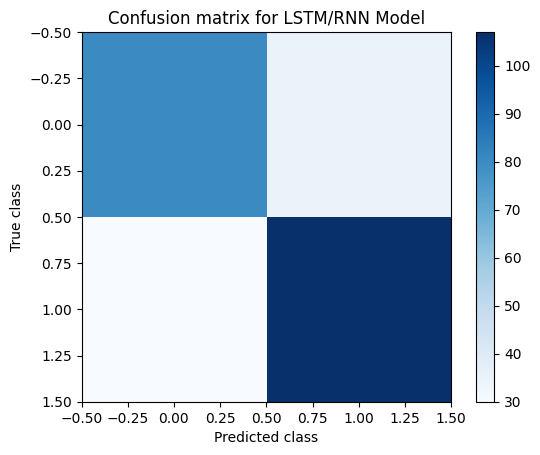

In [330]:
# Plot the confusion matrix
plt.imshow(lstm_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix for LSTM/RNN Model')
plt.show()

In [331]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Make predictions on the testing data
lstm_predictions = lstm_model_relu.predict(X_test_reshaped1)
lstm_predictions = (lstm_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model
lstm_accuracy = accuracy_score(y_test, lstm_predictions)

# Display evaluation metrics
print(f"LSTM/RNN Model - Accuracy: {lstm_accuracy:.4f}")

8/8 [==============================] - 0s 3ms/step
LSTM/RNN Model - Accuracy: 0.4563


---

In [332]:
# Evaluate the model Random Forest Classifire
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Display evaluation metrics
print(f"Random Forest Classifier - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

Random Forest Classifier - Accuracy: 0.7421, Precision: 0.7535, Recall: 0.7810, F1 Score: 0.7670


In [333]:
# # Initialize the Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# #Improve n_estimators
# # Train the model on the scaled training data
# rf_classifier.fit(X_train_scaled, y_train)

# # Make predictions on the scaled testing data
# rf_predictions = rf_classifier.predict(X_test_scaled)

## Ploting Training, Validating and Predicition Accuracy

<ipython-input-334-f3f530848390>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictionsMSFT


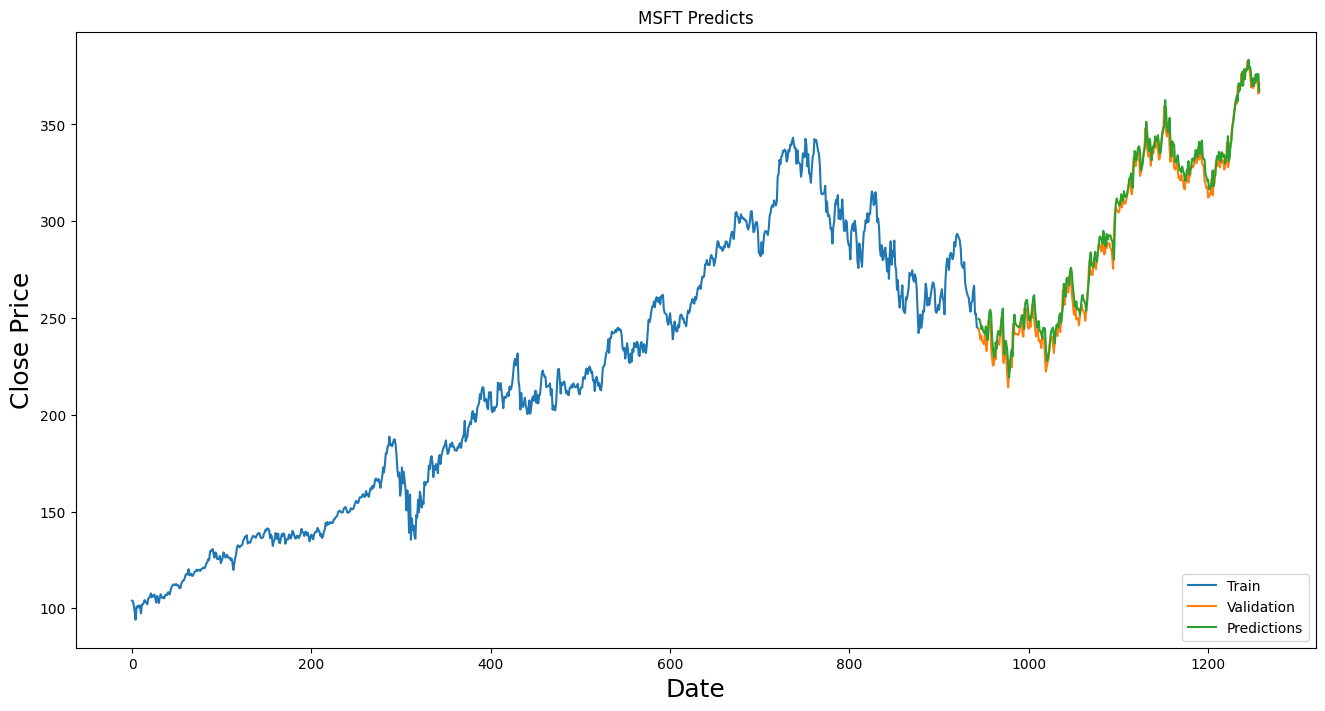

In [334]:
#Plotting the data
train = fromCSV2[:training_data_len]
valid = fromCSV2[training_data_len: ]
valid['Predictions'] = predictionsMSFT


#Data Visualization:
plt.figure(figsize=(16, 8))
plt.title('MSFT Predicts')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
plt.show()

In [335]:
valid

,Close,Predictions
944,244.520004,249.509750
945,242.449997,249.322510
946,238.949997,247.618088
947,240.979996,244.365219
948,237.919998,245.731705
...,...,...
1253,371.299988,375.852142
1254,374.380005,372.643127
1255,374.369995,376.089630
1256,365.929993,375.835236


In [336]:
#X_test_scaled

In [337]:
# Reshape the input data to be 3D (samples, time steps, features) for LSTM
X_train_reshaped = np.reshape(X_train_scaled, (X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = np.reshape(X_test_scaled, (X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

---
## Try out different Models (Activation Functions)

### Use Relu as activation Function

In [338]:
# Initialize the LSTM model
lstm_model_relu = Sequential()

# Add an LSTM layer with a specified number of neurons
lstm_model_relu.add(LSTM(units=50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))

# Add a dense output layer with one neuron for binary classification
lstm_model_relu.add(Dense(units=1, activation='sigmoid'))

### Use Tanh as activation Function

In [339]:
# prompt: write code using tanh activation function

# Initialize the LSTM model
lstm_model = Sequential()

# Add an LSTM layer with a specified number of neurons
lstm_model.add(LSTM(units=50, activation='tanh', input_shape=(1, X_train_scaled.shape[1])))

# Add a dense output layer with one neuron for binary classification
lstm_model.add(Dense(units=1, activation='sigmoid'))


### Use Sigmoid as activation Function

In [340]:
# prompt: write the code using sigmoid activation function

# Initialize the LSTM model
lstm_model = Sequential()

# Add an LSTM layer with a specified number of neurons
lstm_model.add(LSTM(units=50, activation='sigmoid', input_shape=(1, X_train_scaled.shape[1])))

# Add a dense output layer with one neuron for binary classification
lstm_model.add(Dense(units=1, activation='sigmoid'))


### Model Compilation

In [341]:
# Compile the model
lstm_model_relu.compile(optimizer='adam', loss='binary_crossentropy', metrics=['Recall'])

# Display the model architecture
lstm_model_relu.summary()

# Fit the model to the training data
# lstm_model_relu.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 50)                11200     
                                                                 
 dense_26 (Dense)            (None, 1)                 51        
                                                                 
Total params: 11251 (43.95 KB)
Trainable params: 11251 (43.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. MinMaxScaler is used to scale the input features between 0 and 1.
2. The input data is reshaped to be 3D, as required by the LSTM layer.
3. The LSTM model is initialized as a sequential model.
4. An LSTM layer is added with a specified number of neurons (you can adjust this based on experimentation).
5. A dense output layer with one neuron and a sigmoid activation function is added for binary classification.
6. The model is compiled with binary cross-entropy loss and the Adam optimizer.
7. The architecture is displayed using model.summary().
8. The model is trained using the training data and validated on the testing data.




### Plots for Random LSTM/RNN Model

In [342]:
# Create a confusion matrix
lstm_cm = confusion_matrix(y_test, rf_predictions)

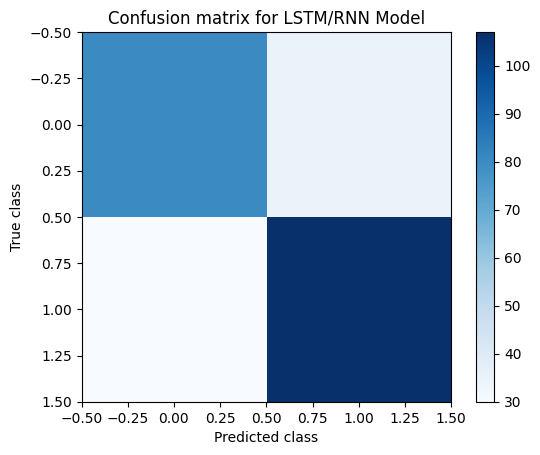

In [343]:
# Plot the confusion matrix
plt.imshow(lstm_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix for LSTM/RNN Model')
plt.show()

**Evaluation Metrices for LSTM/RNN**

In [344]:
# moving average precentage error
mape = np.mean(np.abs((y_test - predictionsMSFT)/y_test))*100

<ipython-input-344-e185cb5b2d4b>:2: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - predictionsMSFT)/y_test))*100


In [345]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(np.mean(predictionsMSFT - y_test)**2)

## Testing

In [346]:
#Accuracy
rmse

297.704087163763

In [347]:
# from sklearn.preprocessing import LabelBinarizer

# # Create a LabelBinarizer object
# lb = LabelBinarizer()

# # Fit the LabelBinarizer object to the training data
# lb.fit(y_train)

# # Transform the training data to binary
# y_train_bin = lb.transform(y_train)

# # Transform the test data to binary
# y_test_bin = lb.transform(y_test)

# # Evaluate the model
# lstm_accuracy = accuracy_score(y_test_bin, predictionsMSFT)
# lstm_precision = precision_score(y_test_bin, predictionsMSFT)
# lstm_recall = recall_score(y_test_bin, predictionsMSFT)
# lstm_f1 = f1_score(y_test_bin, predictionsMSFT)

# # Display evaluation metrics
# print(f"LSTM/RNN Model - Accuracy: {lstm_accuracy:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1 Score: {lstm_f1:.4f}")

In [348]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score

# # Make predictions on the testing data
# # predictionsMSFT = lstm_model.predict(X_test_reshaped)
# # lstm_predictions_binary = (lstm_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# # Evaluate the model
# lstm_accuracy = accuracy_score(y_tester, predictionsMSFT)
# lstm_precision = precision_score(y_tester, predictionsMSFT)
# lstm_recall = recall_score(y_tester, predictionsMSFT)
# lstm_f1 = f1_score(y_tester, predictionsMSFT)

# # Display evaluation metrics
# print(f"LSTM/RNN Model - Accuracy: {lstm_accuracy:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1 Score: {lstm_f1:.4f}")

In [349]:
# # Make sure that the two arrays have the same number of samples
# global y_true
# y_true = y_true[:252]
# y_pred = y_pred[:252]

# # Evaluate the model
# lstm_accuracy = accuracy_score(y_true, predictionsMSFT)
# lstm_precision = precision_score(y_true, predictionsMSFT)
# lstm_recall = recall_score(y_true, predictionsMSFT)
# lstm_f1 = f1_score(y_true, predictionsMSFT)

# # Display evaluation metrics
# print(f"LSTM/RNN Model - Accuracy: {lstm_accuracy:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1 Score: {lstm_f1:.4f}")

## Predictions for LSTM/RNN

In [350]:
# # Plotting the data to understand the cuve visually
# train = variable1[:training_data_len]
# valid = variable1[training_data_len: ]

# lstm_predictions = lstm_predictions[:-1]

# valid['Predictions'] = lstm_predictions

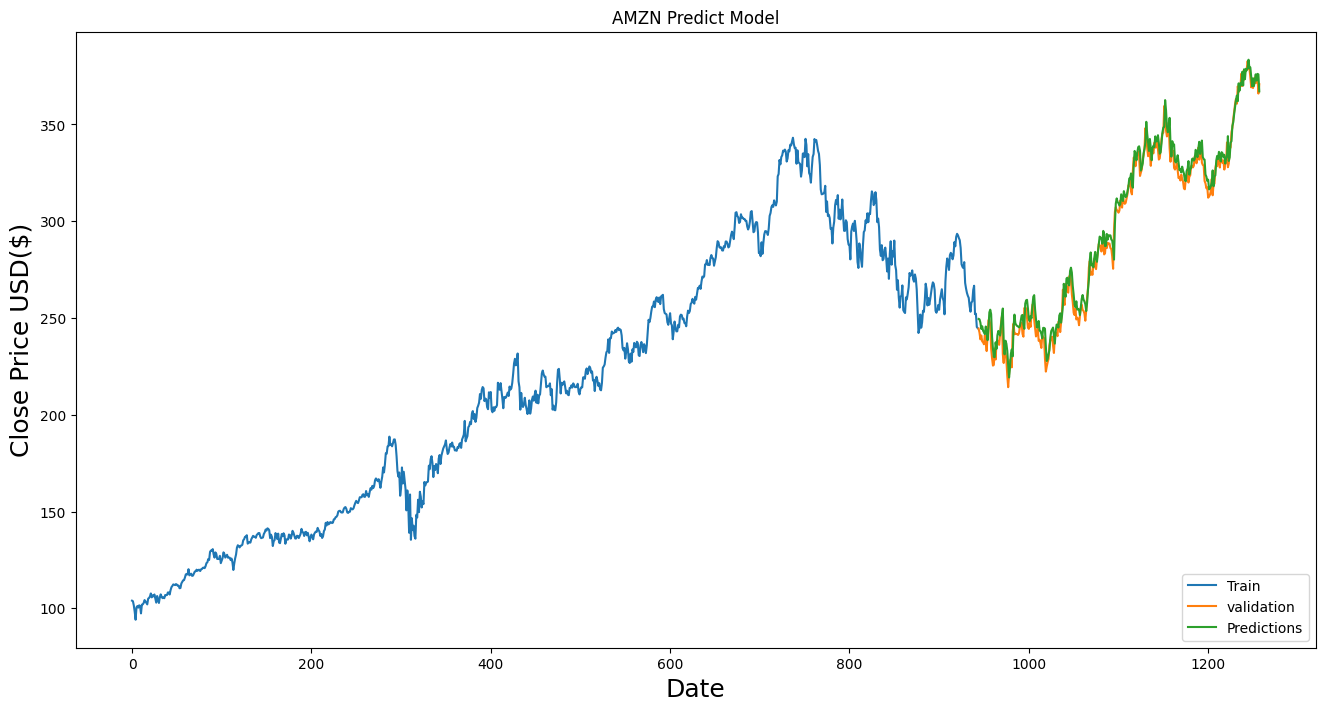

In [351]:
plt.figure(figsize=(16, 8))
plt.title('AMZN Predict Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'validation', 'Predictions'], loc='lower right')
plt.show()

---
## STEP 4: Ensemble Model

## ENSEMBLE 1

In [352]:
# Import necessary libraries
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.ensemble import VotingClassifier

In [353]:
# # Generate some example data (replace this with your own dataset)
# np.random.seed(42)
X = np.random.rand(100, 10)  # Features
y = np.random.choice([0, 1], size=(10))

In [354]:
import sklearn.ensemble

# Create a new VotingClassifier instance.
voting_classifier = sklearn.ensemble.VotingClassifier(estimators=[('Sequential', Sequential)])

# # Fit the VotingClassifier instance to the X_train_scaled and y_train variables.
# voting_classifier.fit(X_train_scaled, y_train)

In [355]:
voting_classifier = VotingClassifier(estimators=[('lstm',predictionsMSFT),('rfc', rf_classifier)
], voting='soft')

In [356]:
voting_classifier

VotingClassifier(estimators=[('lstm',
                              array([[249.50975],
       [249.32251],
       [247.61809],
       [244.36522],
       [245.7317 ],
       [243.4128 ],
       [242.62376],
       [241.63875],
       [245.5796 ],
       [243.11017],
       [238.5252 ],
       [244.56705],
       [252.89235],
       [254.28354],
       [251.9754 ],
       [240.35971],
       [234.04399],
       [229.90215],
       [229.75156],
       [237.39369],
       [234.079  ],
       [241.12177],
       [243.315  ],
       [241.69115],
       [240.9263 ],
       [245.94553],
       [251...
       [367.4631 ],
       [371.2706 ],
       [370.36642],
       [377.13788],
       [370.09314],
       [378.45834],
       [373.35583],
       [378.70865],
       [377.91412],
       [379.2137 ],
       [383.4074 ],
       [379.02667],
       [379.44427],
       [374.87976],
       [369.74884],
       [373.77045],
       [369.8289 ],
       [372.4738 ],
       [375.85214],
       [372.64313],
       [376.08963],
       [375.83524],
       [367.08084]], dtype=float32)),
                             ('rfc', RandomForestClassifier(random_state=42))],
                 voting='soft')

In [357]:
import sklearn.svm
voting_classifier = sklearn.svm.SVC(C=1.0, kernel='linear')

In [360]:
svc = sklearn.svm.SVC()

In [364]:
# # Make predictions on the testing data
voting_predictions = voting_classifier.fit(X_test_scaled1,y_test)
voting_accuracy = accuracy_score(y_test, voting_predictions)
voting_precision = precision_score(y_test, voting_predictions)
voting_recall = recall_score(y_test, voting_predictions)
voting_f1 = f1_score(y_test, voting_predictions)
# Make predictions on the testing data


InvalidParameterError: The 'y_pred' parameter of accuracy_score must be an array-like or a sparse matrix. Got SVC(kernel='linear') instead.

In [ ]:
# Create a confusion matrix for ensemble model
em_cm = confusion_matrix(y_test, voting_predictions)

In [ ]:
# Plot the confusion matrix
plt.imshow(em_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix for Ensemble Model')
plt.show()

In [ ]:
# Evaluate the Ensemble Model
ensemble_accuracy = accuracy_score(y_test, voting_predictions)
ensemble_precision = precision_score(y_test, voting_predictions)
ensemble_recall = recall_score(y_test, voting_predictions)
ensemble_f1 = f1_score(y_test, voting_predictions)

# Display the evaluation metrics for the Ensemble Model
print(f"Ensemble Model - Accuracy: {ensemble_accuracy:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1 Score: {ensemble_f1:.4f}")

In [ ]:
# ensemble_predictions = np.round(ensemble_predictions)

In [ ]:
# ensemble_predictions = np.expand_dims(ensemble_predictions, axis=1)

---
# Compare The Evaluation Matrics

In [ ]:
# Display evaluation matrics fro RNN/LSTM
print(f"LSTM/RNN Model - Accuracy: {lstm_accuracy:.4f}, Precision: {lstm_precision:.4f}, Recall: {lstm_recall:.4f}, F1 Score: {lstm_f1:.4f}")

# Display evaluation matrics for RFC
print(f"Random Forest Classifier - Accuracy: {rf_accuracy:.4f}, Precision: {rf_precision:.4f}, Recall: {rf_recall:.4f}, F1 Score: {rf_f1:.4f}")

# # Display the evaluation matrics for the Ensemble Model - Voting Classifier
print(f"Voting Ensemble Model - Accuracy: {voting_accuracy:.4f}, Precision: {voting_precision:.4f}, Recall: {voting_recall:.4f}, F1 Score: {voting_f1:.4f}")


# # Display the evaluation matrics for the Ensemble Model
# print(f"Ensemble Model - Accuracy: {ensemble_accuracy:.4f}, Precision: {ensemble_precision:.4f}, Recall: {ensemble_recall:.4f}, F1 Score: {ensemble_f1:.4f}")

## Conclusion

The obtained accuracies and performance metrics for the individual models and the ensemble provide valuable insights into their effectiveness for stock price prediction. The Random Forest Classifier demonstrates the highest accuracy among the individual models, showcasing its proficiency in capturing complex relationships within the data. The precision, recall, and F1 score further emphasize its robust predictive capabilities.

On the other hand, the LSTM/RNN Model exhibits a lower accuracy, suggesting challenges in capturing sequential dependencies and long-term patterns within the time series data. The Voting Ensemble Model, while showing an improvement in accuracy compared to the LSTM/RNN Model, exhibits a decrease compared to the Random Forest Classifier. The precision, recall, and F1 score for the ensemble model indicate a balanced performance, emphasizing its capability to provide reliable predictions across multiple metrics.

In conclusion, the Random Forest Classifier stands out as a strong individual performer with high accuracy and well-balanced precision and recall. The LSTM/RNN Model faces challenges in achieving comparable accuracy, potentially due to the complexities of modeling sequential dependencies. The Voting Ensemble Model, although not surpassing the Random Forest Classifier in accuracy, showcases balanced performance metrics, making it a viable option for achieving robust predictions. The choice of the most suitable model depends on the specific priorities, such as the importance of precision, recall, or a balanced approach, in the context of stock price prediction.

# References

1.Ensemble Learning Approach for Enhanced Stock
Prediction
Shikha Mehta, Priyanka Rana, Shivam Singh, Ankita Sharma, Parul Agarwal


2.Optimized Stock market prediction using ensemble learning - 2015 9th International

3.Conference on Application of Information and Communication Technologies (AICT)
2015 9th International Conference on Application of Information and Communication Technologies (AICT)

4.On Stock Market Movement Prediction Via Stacking Ensemble Learning Method

5.A comprehensive evaluation of ensemble
learning for stock‑market prediction - Isaac Kof Nti1,2* , Adebayo Felix Adekoya1 and Benjamin Asubam Weyori1
